# BIEN 514 Homework 2 Problem 3
**Alain Peng Zhang**

February 19th, 2026

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Simulating random walk

In [ ]:
def random_steps(N:int, b):
    """"
    Generate random steps for 2-D freely jointed chain

    Parameters
    ---------_
        N : number of Kuhn monomers
        b : Kuhn length (nm)
    """
    theta = np.random.uniform(0, 2*np.pi, N) # generate N theta angles
    x_steps = b * np.cos(theta) # calculate step x-displacement
    y_steps = b * np.sin(theta) # calculate step y-displacement

    return x_steps, y_steps

In [ ]:
def random_walk(N:int, b):
    """"
    Simulate random walk for 2-D freely jointed chain

    Parameters
    ---------_
        N : number of Kuhn monomers
        b : Kuhn length (nm)
    """
    x_steps, y_steps = random_steps(N, b)
    x_coords = [0]
    y_coords = [0]

    for i in range(N): # recursively add steps and append to coordinates
        x_coords.append(np.sum(x_steps[:i+1]))
        y_coords.append(np.sum(y_steps[:i+1]))

    return x_coords, y_coords

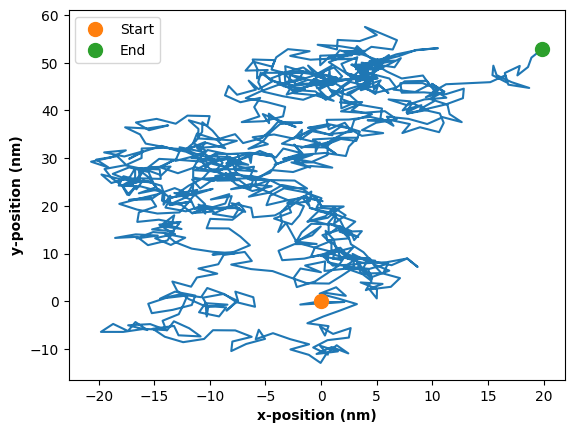

In [344]:
x, y = random_walk(1000, 2)

size = 10

plt.plot(x, y)
plt.plot(0, 0, 'o', markersize=size, label='Start')
plt.plot(x[-1], y[-1], 'o', markersize=size, label='End')


plt.xlabel('x-position (nm)', weight='bold')
plt.ylabel('y-position (nm)', weight='bold')
plt.legend()
plt.show()

Assuming all Kuhn monomer orientations are equally likely, the mean squared end-to-end distance in x must be equal to the mean squared end-to-end distance in y. Thus, both equal 1/2 Nb^2 

In [ ]:
def mean_square_e2e_disp(n:int, N:int, b):
    """"
    Calculate the mean square end-to-end distance for
    2-D freely jointed chains (trials)

    Parameters
    ---------_
        n : number of chains
        N : number of Kuhn monomers
        b : Kuhn length (nm)
    """
    steps = random_steps((n, N), b) # generate n chains/trials with N monomers
    endpoints = np.sum(steps, axis=2) # chain end positions
    se2ed = np.sum(np.square(endpoints), axis=0) # squared end-to-end distance
    mse2ed = np.mean(se2ed) # overall msd
    mse2ed_x = np.mean(np.square(endpoints)[0]) # msd in x
    mse2ed_y = np.mean(np.square(endpoints)[1]) # msd in y

    return mse2ed, mse2ed_x, mse2ed_y

msd_results = mean_square_e2e_disp(100000, 1000, 2)

print(f"<R^2> : {msd_results[0]}") # 4001.4 nm^2
print(f"<Rx^2>: {msd_results[1]}") # 1991.6 nm^2
print(f"<Ry^2>: {msd_results[2]}") # 2009.8 nm^2



<R^2> : 4001.4128704132154
<Rx^2>: 1991.6368923630878
<Ry^2>: 2009.775978050127


In [ ]:
def histogram 